## 6.1 

### 6.1.2 SGD

In [0]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr
  
  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

### 6.1.3 SGD 缺点

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 

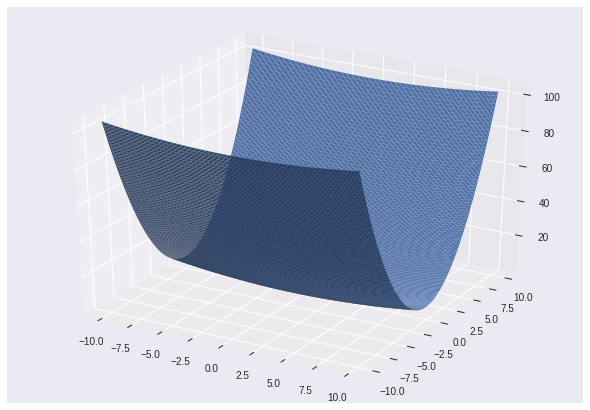

In [10]:
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X,Y = np.meshgrid(X,Y)
Z = 1/20 * X * X + Y * Y
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z,rstride=1, cstride=1)
plt.show()

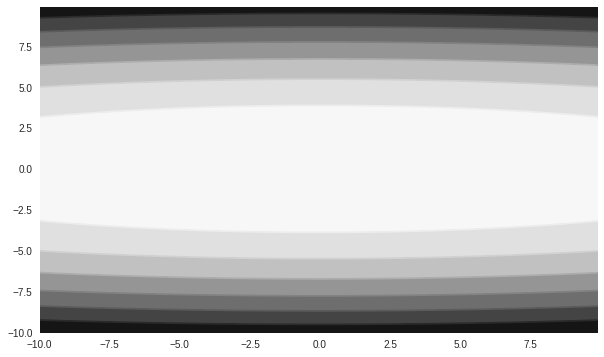

In [12]:
plt.figure(figsize=(10,6))
plt.contourf(X,Y,Z)
plt.contour(X,Y,Z)
plt.show()

### 6.1.4 Momentum

In [0]:
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None
  
  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)
      for key in params.keys():
        self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
        params[key] += self.v[key]

### 6.1.5 AdaGrad

In [0]:
class AdaGrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None
  def update(self, params, grads):
    if self.h is None:
      self.h = {}
    for key, val in params.items():
      self.h[key] = np.zeros_like(val)
    
    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)